posterior distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, gamma
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})

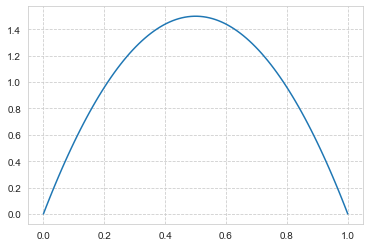

In [2]:
a = 2
b= 2
x = np.linspace(0, 1, 100)
p_pri = beta.pdf(x, a, b)
plt.plot(x, p_pri)

(array([  2.,  19.,  56.,   0., 143., 274.,   0., 269., 178.,  59.]),
 array([ 3. ,  3.7,  4.4,  5.1,  5.8,  6.5,  7.2,  7.9,  8.6,  9.3, 10. ]),
 <a list of 10 Patch objects>)

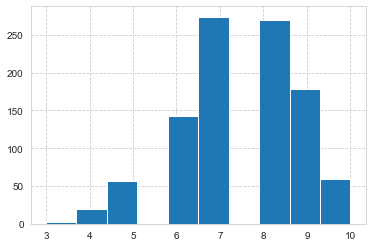

In [3]:
p_target = np.random.binomial(10, 0.75, 1000)
plt.hist(p_target)

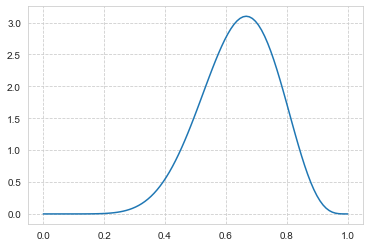

In [4]:
N = 10
m = p_target[0]
a += m
b += N - m
p_post = beta.pdf(x, a, b)
plt.plot(x, p_post)

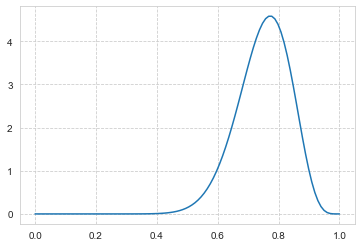

In [5]:
N = 10
m = p_target[1]
a += m
b += N - m
p_post = beta.pdf(x, a, b)
plt.plot(x, p_post)


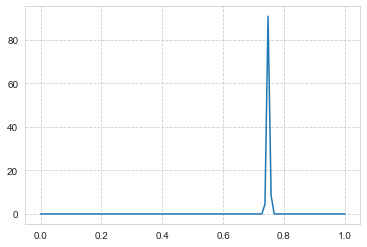

In [6]:
for i in range(2, 1000):
    N = 10
    m = p_target[i]
    # 式（2.18）
    a += m
    b += N - m
    p_post = beta.pdf(x, a, b)
plt.plot(x, p_post)

2.3.6 ガウス分布に対するベイズ推論(分散既知，平均推定)

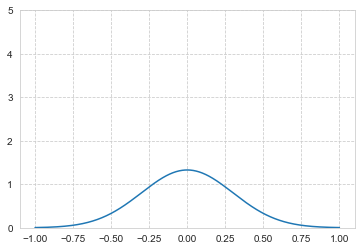

In [7]:
mu0 = 0
sigma0 = 0.3
x = np.linspace(-1, 1, 1000)
p_pri = norm.pdf(x, mu0, sigma0)
plt.ylim(0, 5)
plt.plot(x, p_pri)

C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


(array([0.10028775, 0.70201428, 1.53774557, 2.62419625, 3.74407618,
        3.61035917, 2.34004761, 1.37059931, 0.60172653, 0.08357313]),
 array([0.51044066, 0.5702685 , 0.63009634, 0.68992419, 0.74975203,
        0.80957987, 0.86940771, 0.92923556, 0.9890634 , 1.04889124,
        1.10871908]),
 <a list of 10 Patch objects>)

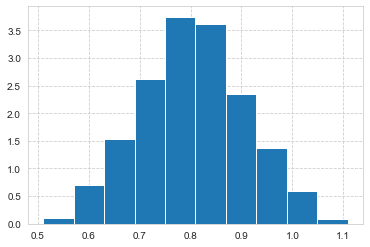

In [8]:
mu = 0.8
sigma = np.sqrt(0.1)
target = np.random.normal(mu, sigma**2, 1000)
plt.hist(target, normed=True)

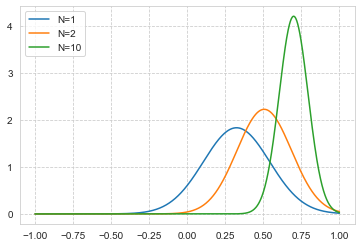

In [9]:
for i in [1, 2, 10]:
    data = target[:i]
    mu_ML = data.mean()
    mu_N = (sigma**2 / (i*sigma0**2+sigma**2)) * mu0 + (i*sigma0**2 / (i*sigma0**2+sigma**2)) * mu_ML
    sigma_N = 1 / np.sqrt(1 / sigma0**2 + i / sigma**2)
    p_post = norm.pdf(x, mu_N, sigma_N)
    plt.plot(x, p_post, label=f'N={i}')
    plt.legend()

2.3.7 ステューデントのt関数

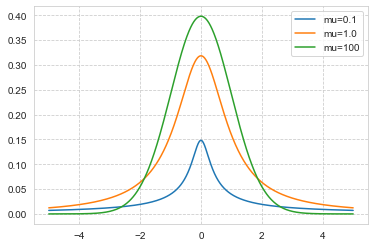

In [10]:
# この分布は平均は同じだが，精度は異なるようなガウス分布を無限に足したものである

from math import gamma

mu = 0
lam = 1.0
x = np.linspace(-5, 5, 1000)
for nu in [0.1, 1.0, 100]:
    p = gamma(nu/2+1/2) / gamma(nu/2) * (lam/(np.pi*nu))**(1/2) * (1 + lam*((x-mu)**2)/nu)**(-nu/2 - 1/2)
    plt.plot(x, p, label=f'mu={nu}')
    plt.legend()

C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


(-5, 10)

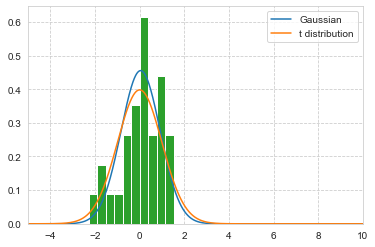

In [11]:
data = np.random.normal(0, 1, 30)
x = np.linspace(-5, 10, 1000)

mu_ML = data.mean()
sigma_ML = ((data-mu_ML)**2).mean()
gau = norm.pdf(x, mu_ML, sigma_ML)

mu=0
lam=1.0
nu=100
t = gamma(nu/2+1/2) / gamma(nu/2) * (lam/(np.pi*nu))**(1/2) * (1 + lam*((x-mu)**2)/nu)**(-nu/2 - 1/2)

plt.plot(x, gau, label='Gaussian')
plt.plot(x, t, label='t distribution')
plt.hist(data, normed=True)
plt.legend()
plt.xlim(-5, 10)

2.3.8 フォン・ミーゼス分布

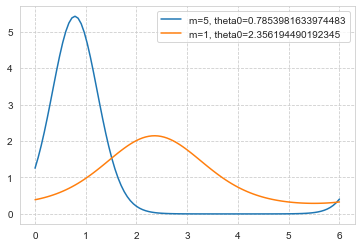

In [12]:
for m, theta0 in zip([5, 1], [np.pi/4, 3*np.pi/4]):
    I0 = 0
    t_array = np.linspace(0, 2*np.pi, 1000)
    for t in t_array:
        I0 += 1/(2*np.pi)*np.e**(m*np.cos(t))*(1/1000)
    theta = np.linspace(0, 6, 100)
    p = 1 / (2*np.pi*I0) * np.e**(m*np.cos(theta-theta0))
    plt.plot(theta, p, label=f'm={m}, theta0={theta0}')
    plt.legend()

2.5 ノンパラメトリック法

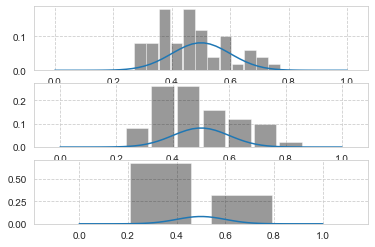

In [13]:
# ヒストグラム密度推定法
data = np.random.normal(0.5, 0.1, 50)
for i, delta in enumerate([0.04, 0.08, 0.25]):
    N = int(1 / delta)
    p = np.zeros(N)
    for j in range(N):
        p[j] = len(data[(j*delta<data) & (data<(j+1)*delta)]) / (N*delta)
    x_data = np.linspace(0, 1, 50)
    p_data = norm.pdf(x_data, 0.5, 0.1)
    p_data /= p_data.sum()
    plt.subplot(3, 1, i+1)
    plt.plot(x_data, p_data, zorder=2)
    x = np.linspace(0, 1, N)
    p /= p.sum()
    plt.bar(x, p, width=delta, zorder=1, color='black', alpha=0.4)

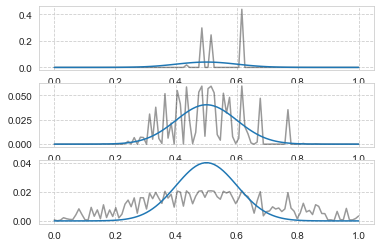

In [14]:
# カーネル推定法
N = 100
data = np.random.normal(0.5, 0.1, N)
x = np.linspace(0, 1, N)
x_data = np.linspace(0, 1, N)
for i, h in enumerate([0.005, 0.07, 0.2]):
    p = np.e**(-(x-data)**2 / (2*h**2)) / ((2*np.pi*h**2)**(1/2)*N)
    p_data = norm.pdf(x_data, 0.5, 0.1)
    p_data /= p_data.sum()
    plt.subplot(3, 1, i+1)
    plt.plot(x_data, p_data, zorder=2)
    p /= p.sum()
    plt.plot(x, p, zorder=1, color='black', alpha=0.4)

